# Libraries and Dependencies



In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Retention Model

In [2]:
import numpy as np
from scipy.optimize import curve_fit

class RetentionModel:
    def __init__(self):
        self.params = None  # Initialize the model's parameters to None.

    @staticmethod
    def power_law(x, a, k, b):
        # Define the power-law function used to model the data.
        return a * np.power(x, -k) + b

    def fit(self, x_data, y_data):
        # Function to fit the power-law model to the provided data.
        # Initial parameter estimation
        a_init = max(y_data)  # Initialize 'a' parameter as the maximum value of y_data.
        k_init = 1  # Initialize 'k' parameter with an initial guess of 1.
        b_init = min(y_data)  # Initialize 'b' parameter as the minimum value of y_data.

        initial_guess = [a_init, k_init, b_init]  # Create a list with initial guesses for the parameters.
        lower_bounds = [0, 0, 0]  # Define lower bounds for the parameters during fitting.
        upper_bounds = [np.inf, np.inf, np.inf]  # Define upper bounds for the parameters during fitting.

        # Use scipy's curve_fit function to find the best-fit parameters that minimize the residual sum of squares.
        self.params, _ = curve_fit(self.power_law, x_data, y_data, p0=initial_guess, bounds=(lower_bounds, upper_bounds))

    def predict(self, x):
        # Function to predict retention values for given input 'x' using the fitted model.
        if self.params is None:
            raise Exception("You need to fit the model before predicting!")  # Check if the model is fitted.

        # Use the fitted parameters to calculate predicted retention values using the power-law function.
        return self.power_law(x, *self.params)

    def extrapolate(self, start, end):
        # Function to extrapolate retention values beyond the given data range.
        if self.params is None:
            raise Exception("You need to fit the model before extrapolating!")  # Check if the model is fitted.

        # Generate a range of 'x' values from 'start' to 'end'.
        x = np.arange(start, end + 1)

        # Use the fitted parameters to calculate the corresponding 'y' values for the extrapolated 'x' range.
        y = self.power_law(x, *self.params)

        return x, y


#Usage Function

In [3]:
def run_retention_forecast():
    # Get the input data interactively from the user.
    print("Please enter the days data (separated by commas):")
    days_input = input().strip()
    days = [int(day) for day in days_input.split(',')]

    print("Please enter the retention data (separated by commas):")
    retention_input = input().strip()
    retention = [float(r.strip('%')) / 100 for r in retention_input.split(',')]

    # Create a DataFrame from the input data.
    data_complex_ww = {"day": days, "retention": retention}
    df_ww_0 = pd.DataFrame(data_complex_ww)

    # Initialize the model and fit it to the data.
    model = RetentionModel()
    model.fit(df_ww_0['day'], df_ww_0['retention'])

    # Forecast the retention values for days 1 to 360.
    days_to_forecast = np.arange(1, 361)
    forecasted_data = model.predict(days_to_forecast)

    # Create a DataFrame to store the forecasted data.
    forecast_df = pd.DataFrame({"day": days_to_forecast, "forecasted_retention": forecasted_data})

    return df_ww_0, forecast_df

def plot_forecast(df_actual, df_forecast):
    plt.figure(figsize=(10, 6))
    plt.scatter(df_actual['day'], df_actual['retention'], label='Actual Data', color='blue')
    plt.plot(df_forecast['day'], df_forecast['forecasted_retention'], label='Forecasted Line', color='red')
    plt.xlabel('Days')
    plt.ylabel('Retention')
    plt.legend()
    plt.title('Retention Forecast')
    plt.grid(True)
    plt.show()

def score_points(df_actual, df_forecast):
    # Calculate the absolute difference between actual and forecasted retention values.
    df_forecast_actual = df_forecast.merge(df_actual, on='day', suffixes=('_forecast', '_actual'))
    df_forecast_actual['abs_diff'] = np.abs(df_forecast_actual['forecasted_retention'] - df_forecast_actual['retention'])
    mean_abs_diff = df_forecast_actual['abs_diff'].mean()
    return mean_abs_diff

# Example

Please enter the days data (separated by commas):
1,3,7,30
Please enter the retention data (separated by commas):
35.25%,12.45%,6%,1.5%


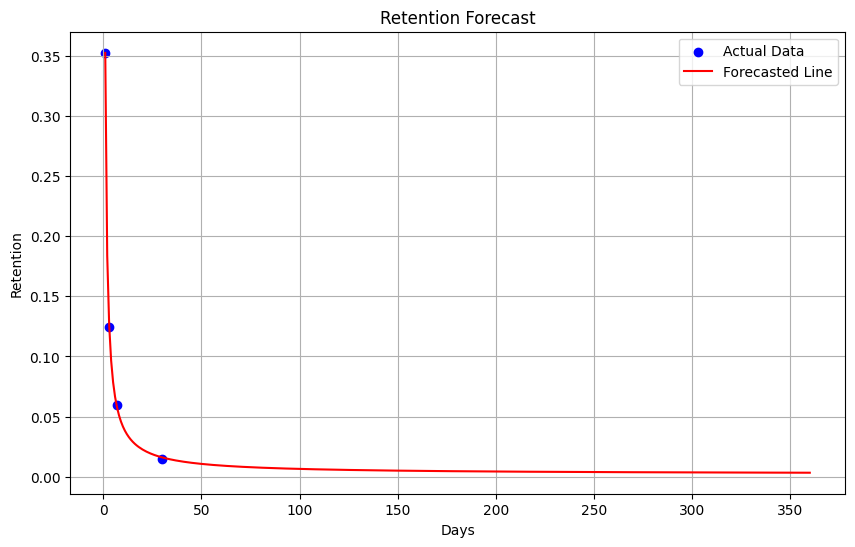

Mean Absolute Difference: 0.001272312188953283


In [4]:

# Example usage:
if __name__ == "__main__":
    actual_data, forecast_data = run_retention_forecast()
    plot_forecast(actual_data, forecast_data)
    score = score_points(actual_data, forecast_data)
    print("Mean Absolute Difference:", score)

In [5]:
forecast_data

,day,forecasted_retention
0,1,0.352301
1,2,0.183919
2,3,0.125997
3,4,0.096470
4,5,0.078501
...,...,...
355,356,0.003336
356,357,0.003332
357,358,0.003329
358,359,0.003325
